In [1]:
from ultralytics import RTDETR
import cv2

In [2]:
model = RTDETR('rtdetr-l.pt') 

100%|█████████████████████████████████████████████████████████████████████████████| 63.4M/63.4M [00:06<00:00, 9.98MB/s]


In [ ]:
model.train(
    data='rtdetr.yaml',     # Ruta al archivo de configuración del dataset
    epochs=100,
    imgsz=640,
    batch=4,
    device=0,                # Usa GPU 0. Cambia a 'cpu' si no tienes GPU.
    augment=True
)


image 1/1 C:\Users\Gerardo\Documents\RTDETR chido\dataset\test\images\2F2F-P226-17.jpg: 640x640 1 gun, 60.7ms
Speed: 8.9ms preprocess, 60.7ms inference, 13.8ms postprocess per image at shape (1, 3, 640, 640)


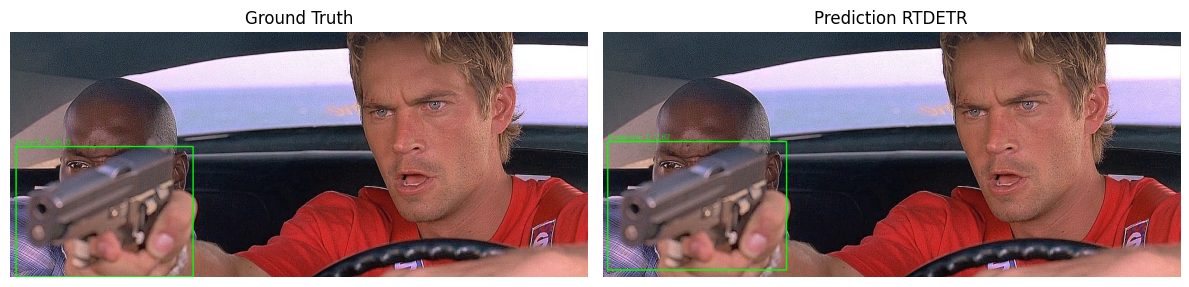

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import random
import cv2
from ultralytics import RTDETR



# Config routes
model_path = './runs/detect/train/weights/best.pt'
images_dir = './dataset/test/images'
labels_dir = './dataset/test/labels'

# Load the custom model
model = RTDETR(model_path) 
model = model.to('cuda')

# Choose a random test image
image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
random_image = random.choice(image_files)
image_path = os.path.join(images_dir, random_image)
label_path = os.path.join(labels_dir, os.path.splitext(random_image)[0] + '.txt')

# Load original image with the ground truth boxes
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w = image.shape[:2]
image_with_gt = image_rgb.copy()

# Draw the boxes
if os.path.exists(label_path):
    with open(label_path, 'r') as f:
        for line in f:
            cls, cx, cy, bw, bh = map(float, line.strip().split())
            x1 = int((cx - bw / 2) * w)
            y1 = int((cy - bh / 2) * h)
            x2 = int((cx + bw / 2) * w)
            y2 = int((cy + bh / 2) * h)
            cv2.rectangle(image_with_gt, (x1, y1), (x2, y2), (0, 255, 0), 2)  # verde
            cv2.putText(image_with_gt, f"Ground Truth {int(cls)}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

# Make the prediction
results = model.predict(source=image_path, save=False, conf=0.5)
result = results[0]  # solo una imagen
image_pred = image_rgb.copy()

# Draw the predictions
for box in result.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    cv2.rectangle(image_pred, (x1, y1), (x2, y2), (0, 255, 0), 2)  # azul
    cv2.putText(image_pred, f"Prediction {cls_id} {conf:.2f}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

# Show both images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_with_gt)
plt.title('Ground Truth')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_pred)
plt.title('Prediction RTDETR')
plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
video = cv2.VideoCapture('./video/toy_gun.mp4')
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
#print(int(video.get(cv2.CAP_PROP_FRAME_COUNT)))


fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify the codec
fps = video.get(cv2.CAP_PROP_FPS)
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('./video/toy_gun_processed.mp4', fourcc, fps, (width, height))


ret = True
frame_num = -1


while ret:
    frame_num += 1
    print(frame_num)
    ret, frame = video.read()

    if not ret:
        break
    
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = model(frame_rgb, conf=0.4)
    detections = results[0].boxes
    for box, conf, cls in zip(detections.xyxy, detections.conf, detections.cls):
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
        label = f"Gun: {conf:.2f}"
        cv2.putText(frame, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        
    # Write processed frame
    out.write(frame)
        
out.release()
video.release()

print("Finalizado")

0

0: 640x640 2 guns, 338.2ms
Speed: 8.5ms preprocess, 338.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
1

0: 640x640 2 guns, 72.3ms
Speed: 5.1ms preprocess, 72.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
2

0: 640x640 2 guns, 70.3ms
Speed: 3.9ms preprocess, 70.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
3

0: 640x640 2 guns, 55.4ms
Speed: 4.1ms preprocess, 55.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
4

0: 640x640 2 guns, 56.9ms
Speed: 4.1ms preprocess, 56.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
5

0: 640x640 2 guns, 50.4ms
Speed: 4.6ms preprocess, 50.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
6

0: 640x640 1 gun, 50.9ms
Speed: 4.4ms preprocess, 50.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
7

0: 640x640 3 guns, 56.7ms
Speed: 4.5ms preprocess, 56.7ms inference, 1.1ms postprocess per image at shape (1, 3, 6